In [ ]:
#import required libraries

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

%matplotlib inline


In [ ]:
#Import Data
df = pd.read_csv('/content/Startups.csv', encoding='latin-1')
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#data cleaning

df = pd.DataFrame(df)
df.rename(columns = {'Date Joined' : 'Date'}, inplace = True) 
df.rename(columns = {'Valuation ($B)' : 'Valuation'}, inplace = True) 
df.rename(columns = {'Select Investors' : 'Investors'}, inplace = True)
df['Investors'] = df['Investors'].to_string()

date = df.Date.str.split('/', expand = True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df['Valuation'] = df['Valuation'].str.replace('$', '')
df. Valuation = pd.to_numeric(df.Valuation)
df.year = pd.to_numeric(df.year)

<ipython-input-6-929400638f03>:17: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df.head(10)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [ ]:
#Year wise comapny joined the unicorn club

fig2 = px.line(df, x='Company', y='year', title= "Year wise Company Joined")
fig2.show()

In [ ]:
#unicorn startups in different industry sector
fig = px.pie(df, names='Industry')
fig.show()

In [ ]:
#Country wise unicorn startup
#let's talk about India

India = df[df['Country']== "India"]
India

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
12,12,BYJU's,21.00,7/25/2017,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2017,25,7
53,53,OYO Rooms,9.60,9/25/2018,India,Gurugram,Travel,"0 Sequoia Capital China, SIG Asia Investm...",2018,25,9
62,62,Dream11,8.00,4/9/2019,India,Mumbai,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,9,4
80,80,National Stock Exchange of India,6.50,7/1/2020,India,Mumbai,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,1,7
83,83,Ola Cabs,7.50,10/27/2014,India,Bengaluru,Auto & transportation,"0 Sequoia Capital China, SIG Asia Investm...",2014,27,10
115,115,Swiggy,5.50,6/21/2018,India,Bengaluru,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2018,21,6
126,126,Meesho,4.90,4/5/2021,India,Bengaluru,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,5,4
153,153,CRED,4.01,4/6/2021,India,Bengaluru,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,4
193,193,Digit Insurance,3.50,1/15/2021,India,Bengaluru,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,15,1
199,199,Unacademy,3.44,9/2/2020,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2020,2,9


In [ ]:
#Based on Valuation

company_wise_valuation = df.sort_values(by="Valuation", ascending=False)
company_wise_valuation.head(10)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [ ]:
fig = px.line(India,  x='Company', y='year', title= "Year wise Company Joined")
fig.show()

In [ ]:
df[df['Company'] =="SpaceX"]

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12


In [ ]:
#Most valued startup city in the world
x = df.groupby('City').sum().sort_values(by = 'Valuation', ascending=False).head(20)
x = x.reset_index()
px.bar(x='City', y='Valuation', data_frame = x)

<ipython-input-14-8354fff5eb54>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
#number of unicorn startups in a city

df.City.value_counts().head(15)

San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Bengaluru         25
Shenzhen          18
Berlin            16
Paris             15
Chicago           14
Hangzhou          14
Boston            14
Tel Aviv          13
Mountain View     13
Palo Alto         11
Name: City, dtype: int64

In [ ]:
#unicorn startups in Bengaluru

df[df.City == 'Bengaluru']['Company']

12                     BYJU's
83                   Ola Cabs
115                    Swiggy
126                    Meesho
153                      CRED
193           Digit Insurance
199                 Unacademy
221                     Udaan
236                  Razorpay
245                 ShareChat
252     Ola Electric Mobility
257                     Groww
299     Mobile Premier League
523                   CureFit
683                      apna
686    Acko General Insurance
709                    InMobi
794                 DailyHunt
871                 BlackBuck
880                   Zetwerk
898                   Vedantu
901                   Licious
920              Mensa Brands
926                  NoBroker
927                     Slice
Name: Company, dtype: object

In [ ]:
#country based unicorn startups

df[df.Country == 'India'][['Company', 'Valuation', 'Industry','year']]

,Company,Valuation,Industry,year
12,BYJU's,21.00,Edtech,2017
53,OYO Rooms,9.60,Travel,2018
62,Dream11,8.00,Internet software & services,2019
80,National Stock Exchange of India,6.50,Fintech,2020
83,Ola Cabs,7.50,Auto & transportation,2014
115,Swiggy,5.50,"Supply chain, logistics, & delivery",2018
126,Meesho,4.90,Internet software & services,2021
153,CRED,4.01,Fintech,2021
193,Digit Insurance,3.50,Fintech,2021
199,Unacademy,3.44,Edtech,2020


In [ ]:
#Fintech Industries based unicorns in India
df[df.Country=='India'][df[df.Country=='India'].Industry == 'Fintech']['Company']

80     National Stock Exchange of India
153                                CRED
193                     Digit Insurance
234                           Pine Labs
236                            Razorpay
257                               Groww
266                            BharatPe
304                        PolicyBazaar
420                    CoinSwitch Kuber
681                             CoinDCX
686              Acko General Insurance
927                               Slice
Name: Company, dtype: object

In [ ]:
#Most Valued unicorn based country

y = df.groupby('Country').sum().sort_values(by='Valuation', ascending=False).head(20)
y = y.reset_index()
px.bar(x='Country', y='Valuation', data_frame=y)


<ipython-input-19-cdf29e8bc946>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
#line graphs
valuation_wise = px.line(df, x='Company', y='Valuation')
valuation_wise.show()

In [ ]:
#line graph
#india based
valuation_india = px.line(India, x='Company', y='Valuation')
valuation_india.show()

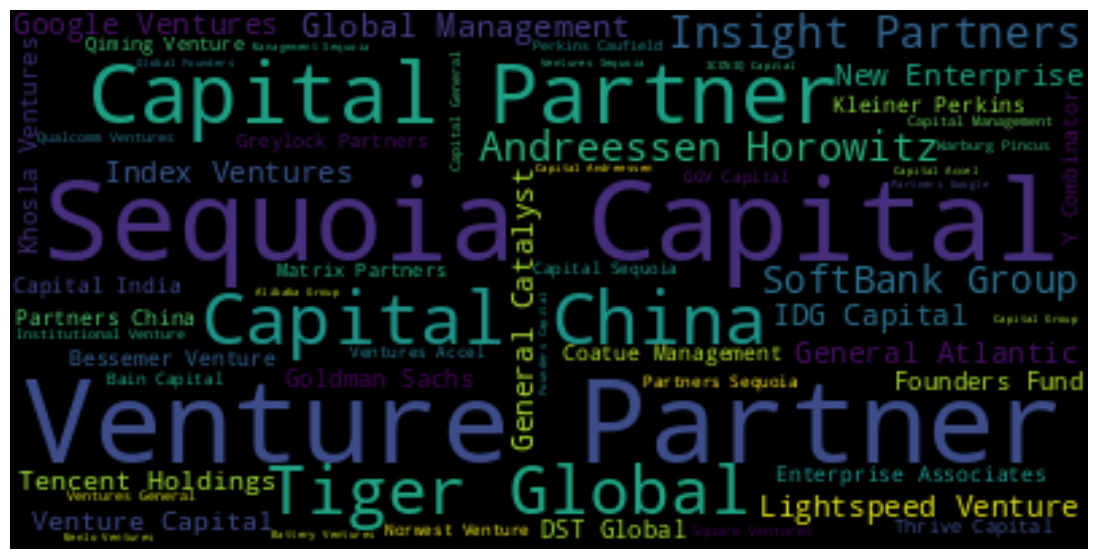

In [ ]:
#Word cloud of investors

from wordcloud import WordCloud
wordCloud = WordCloud().generate(' '.join(df.Investors))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear')
plt.show()

In [ ]:
#Bar graph of company's valuation

total_En_St = df.groupby('Company').sum().sort_values('Valuation', ascending=False).head(20)
total_En_St = total_En_St.reset_index()
px.bar(x='Company', y ='Valuation', data_frame = total_En_St)

<ipython-input-34-b907ca0b365e>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
#City
city_count = px.bar(df, x="City", y='Company')
city_count.show()

In [ ]:
#Geographical Graph

country_codes = {'afghanistan': 'AFG',
                 }

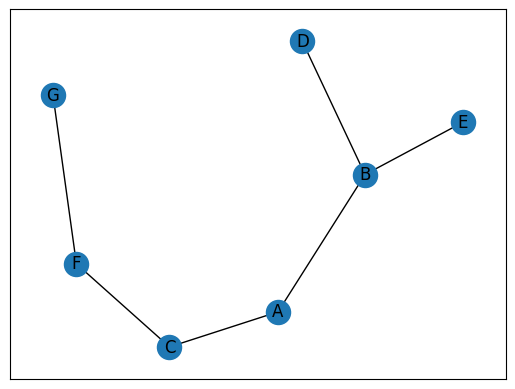

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
graph = nx.Graph()

# Add edges to the graph based on the SQL query output
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('F', 'G')
]
graph.add_edges_from(edges)

# Plot the graph
pos = nx.spring_layout(graph)  # Layout algorithm for graph visualization
nx.draw_networkx(graph, pos=pos, with_labels=True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_excel("/content/price.xlsx")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


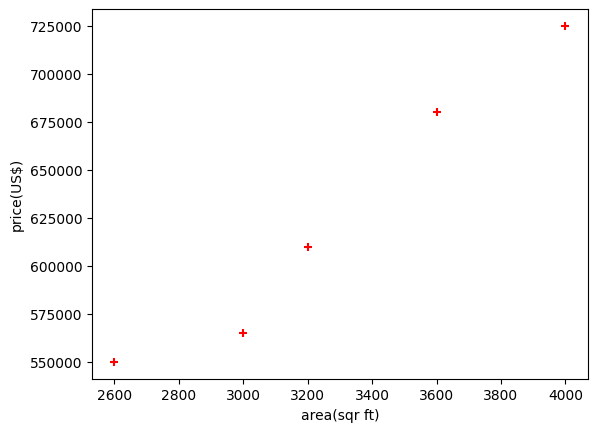

In [ ]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price, color='red', marker='+')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict(5000)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:

135.78767123*3300+180616.4383516432

628715.7534106432

In [ ]:
d = pd.read_csv("areas.csv")
d.head(3)

In [ ]:
p = reg.predict(d)

In [ ]:
d['prices'] = p

In [ ]:
d.to_csv("prediction.csv", index=False)

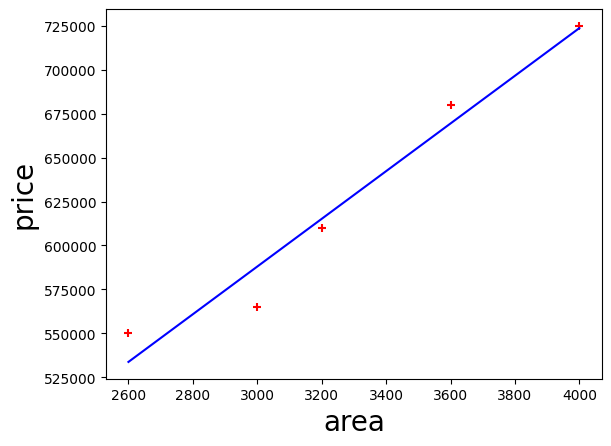

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, reg.predict(df[['area']]),color='blue')

In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [22]:
df = pd.read_csv("Homeprice.csv")
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [23]:
import math
median_bedroom = math.floor(df.bedroom.median())
median_bedroom

3

In [24]:
df.bedroom = df.bedroom.fillna(median_bedroom)
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [37]:
reg = linear_model.LinearRegression()
reg.fit(df[["area","bedroom"]],df.price)

LinearRegression()

In [38]:
reg.coef_

array([   94.56521739, 39782.60869565])

In [39]:
reg.predict([[3000,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([565652.17391304])

In [41]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5569 sha256=5c140cb3253031ab70ddb9034d81538cc5e965e81f1ca6919d357381be1d5c05
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number
